HW6

In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [59]:
def display(A):
    maxX = A.shape[0]
    maxY = A.shape[1]
    B = np.zeros((maxY, maxX))
    for ix in range(0,maxX):
        for iy in range(0,maxY):
            B[maxY-1-iy,ix] = A[ix,iy]
            
    %matplotlib inline
    
    plt.rcParams['figure.figsize'] = [6, 6/maxX*maxY]
    plt.imshow(B); 
    plt.axis('off'); 
    plt.show()
    plt.draw()
    plt.pause(0.01)

In [60]:
nParticles = 10000
maxX = 200
maxY = 40

[[1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]]


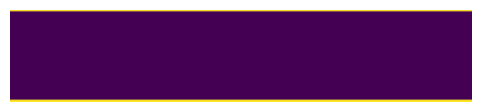

<Figure size 600x120 with 0 Axes>

In [61]:
A = np.zeros((maxX, maxY))

A[:,0] = 1
A[:, 39] = 1
print(A.transpose())

display(A)

[0.9, 0.64, 0.69, 0.66, 0.67, 0.64, 0.68, 0.66715]


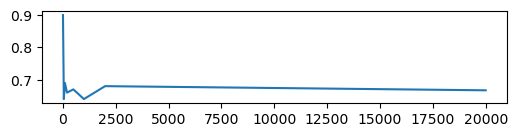

In [62]:
particles = [10, 50, 100, 200, 500, 1000, 2000, 20000]
percent_passed = []

for num in particles:
    count = 0
    for i in range(0,num):
        passed = True
        # Compute new starting point on the line y=yStart
        x  = 199
        y  = 20; #always start at upper limit

        while True:

            r = np.random.random(); # Random float:  0.0 <= r < 1.0
            #based on the value of 'r', move the particle
            #left, right, up, or down and change x and y accordingly
            if r < 0.5:
                x -= 1
            elif r < 0.6:
                x += 1
            elif r < 0.8:
                y += 1
            else:
                y -= 1
            
            #now apply periodic boundary conditions to 'x'
            if x > 199:
                x = 199
            if x < 0:
                break
            if y == 0:
                passed = False
                break
            if y == 39:
                passed = False
                break
        
        if passed:
            count += 1
        
    percent_passed.append(count / num)

#display(A)
print(percent_passed)

plt.plot(particles, percent_passed)
plt.show()

It seems that the percent stabilizes around 65%

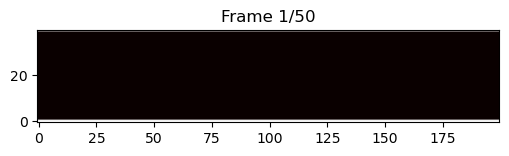

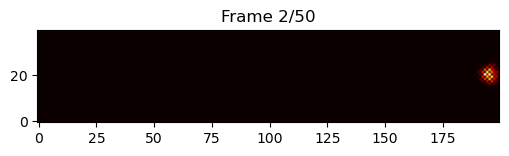

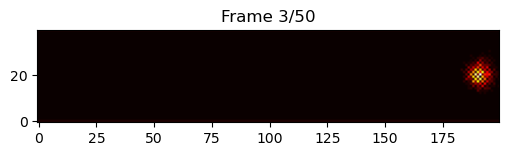

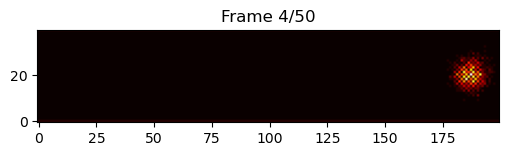

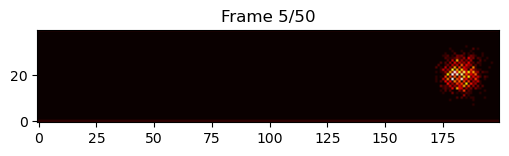

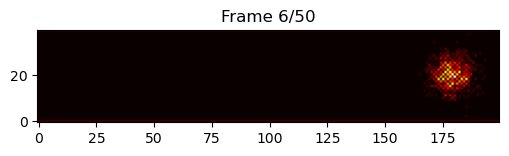

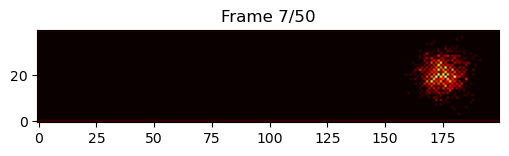

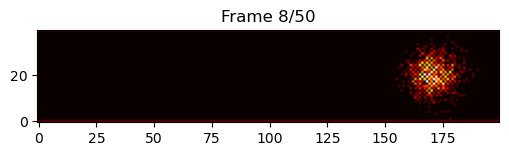

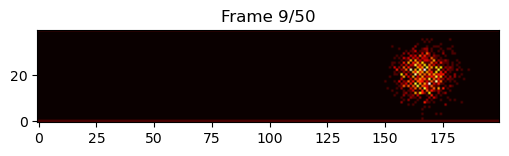

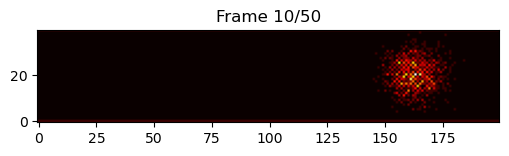

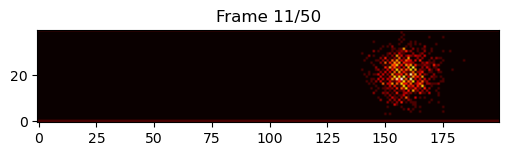

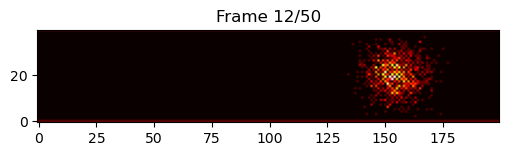

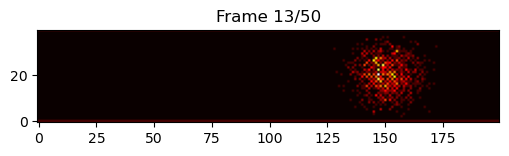

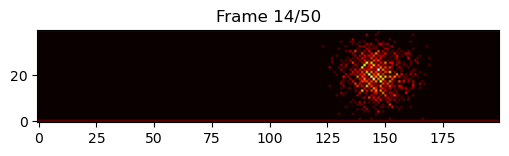

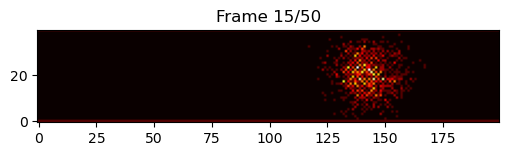

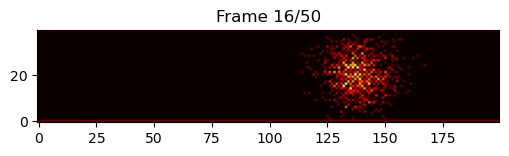

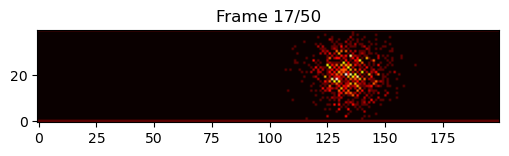

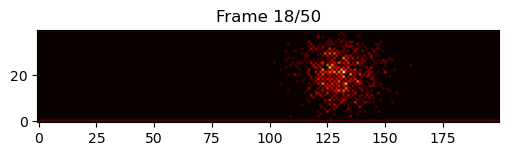

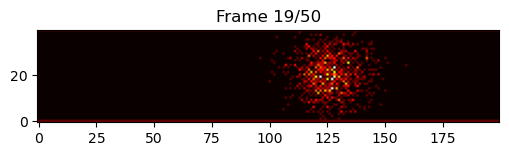

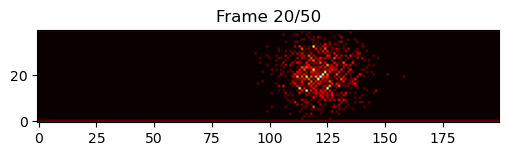

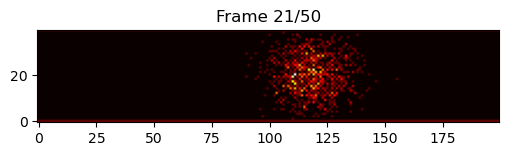

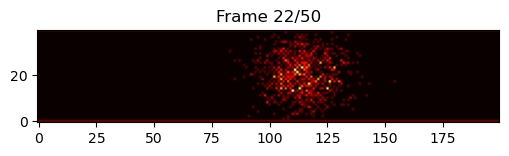

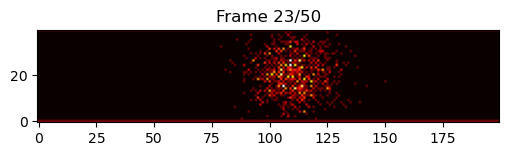

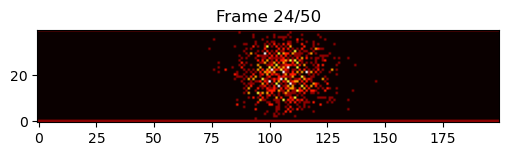

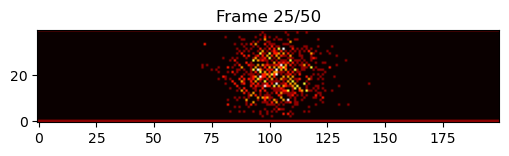

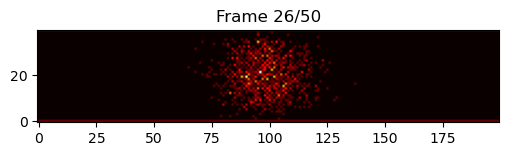

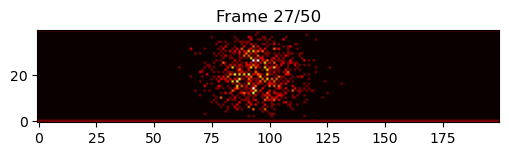

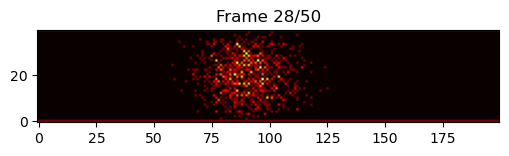

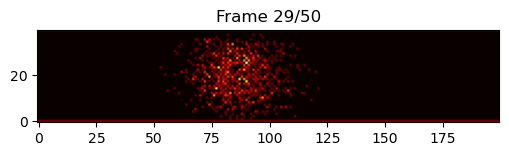

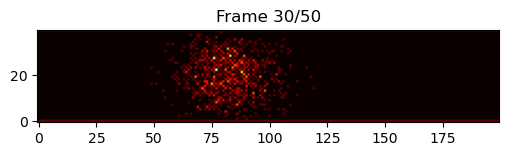

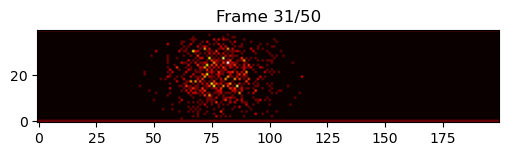

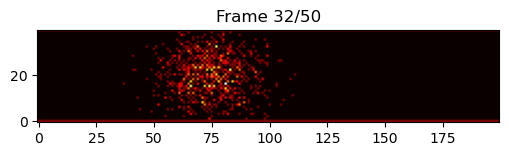

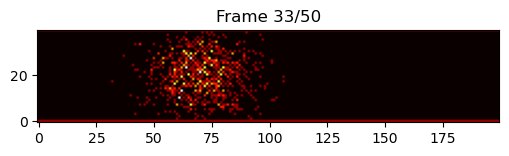

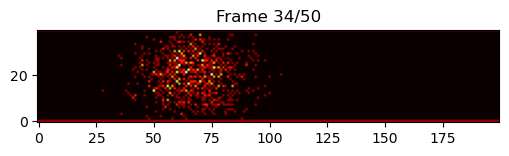

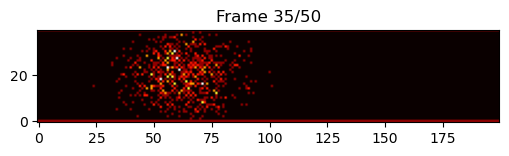

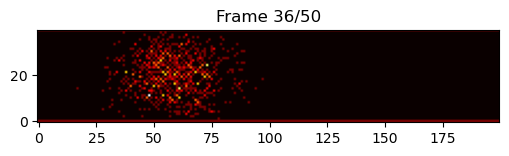

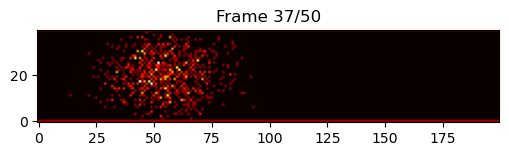

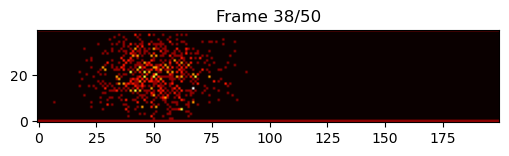

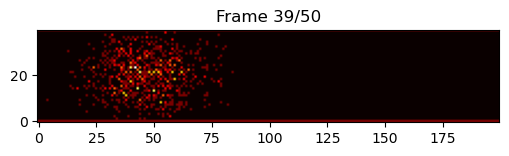

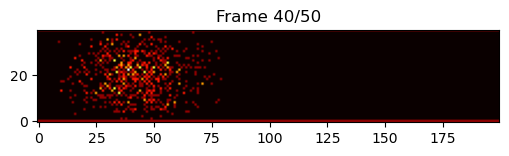

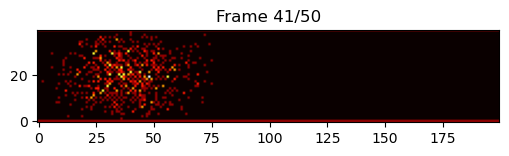

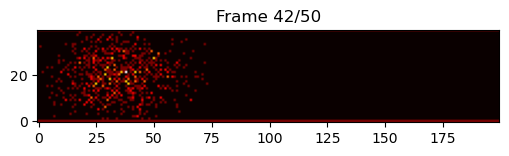

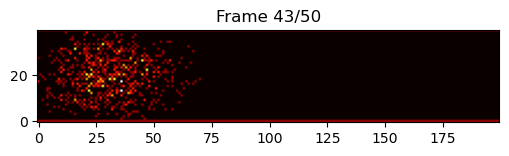

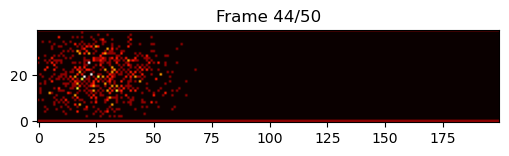

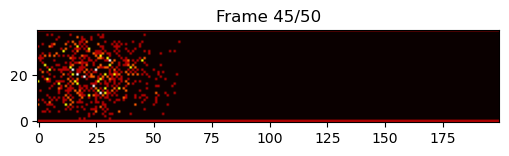

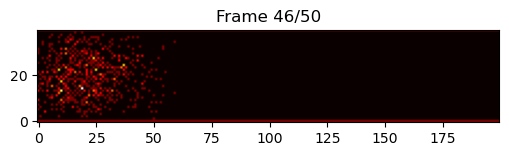

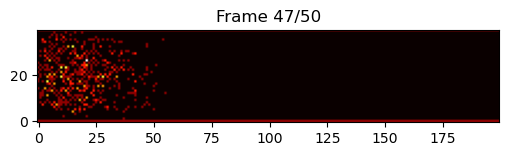

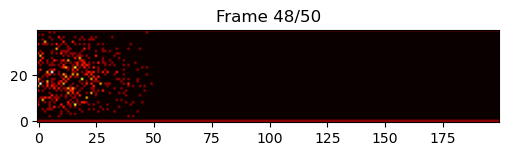

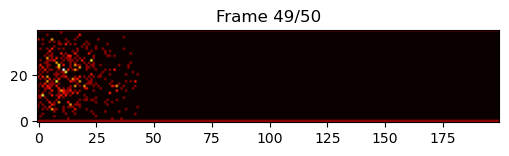

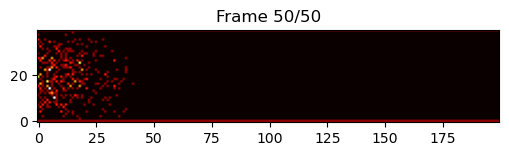

<Figure size 600x120 with 0 Axes>

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# --- Set up domain and pipe walls ---
maxX, maxY = 200, 40
nFrames = 50
num = 1000

# A is the static pipe (1 = wall, 0 = empty)
A = np.zeros((maxX, maxY))
A[:, 0] = 1          # bottom wall
A[:, maxY - 1] = 1   # top wall

# B will store particle positions over time
B = np.zeros((nFrames, maxX, maxY))

# --- Particle simulation ---
for i in range(num):
    x, y = maxX - 1, maxY // 2  # start at middle-right
    step = 0
    inside = True

    while inside:
        r = np.random.random()
        if r < 0.5:
            x -= 1
        elif r < 0.6:
            x += 1
        elif r < 0.8:
            y += 1
        else:
            y -= 1

        step += 1

        # boundary checks
        if x >= maxX:
            x = maxX - 1
        if x < 0 or y <= 0 or y >= maxY - 1:
            inside = False
            break

        # record position every 9 steps
        if step % 10 == 0:
            frame = step // 10
            if frame < nFrames:
                B[frame, x, y] += 1


for i in range(nFrames):
    plt.imshow(A.T + B[i].T, origin='lower', cmap='hot')
    plt.title(f"Frame {i+1}/{nFrames}")
    plt.pause(0.1)
    plt.clf()


N=1000, Success Probability=0.6540
N=2000, Success Probability=0.6495
N=3000, Success Probability=0.6623
N=4000, Success Probability=0.6630
N=5000, Success Probability=0.6568
N=6000, Success Probability=0.6545
N=7000, Success Probability=0.6581
N=8000, Success Probability=0.6651
N=9000, Success Probability=0.6610
N=10000, Success Probability=0.6661
N=11000, Success Probability=0.6684
N=12000, Success Probability=0.6586
N=13000, Success Probability=0.6618
N=14000, Success Probability=0.6704
N=15000, Success Probability=0.6631
N=16000, Success Probability=0.6634
N=17000, Success Probability=0.6658
N=18000, Success Probability=0.6621
N=19000, Success Probability=0.6617
N=20000, Success Probability=0.6627


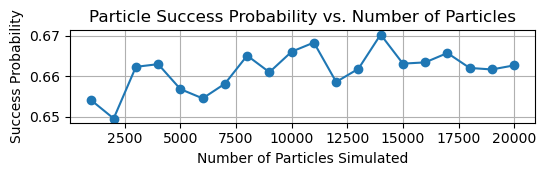


Final success probability ≈ 0.6627


In [ ]:
particles_list = np.arange(1000, 21000, 1000)  # [1000, 2000, ..., 20000]
percent_passed = []

# --- Simulation loop ---
for num in particles_list:
    count = 0  # successful particles
    for i in range(num):
        x, y = maxX - 1, maxY // 2  # start middle-right
        passed = True

        while True:
            r = np.random.random()
            if r < 0.5:
                x -= 1
            elif r < 0.6:
                x += 1
            elif r < 0.8:
                y += 1
            else:
                y -= 1

            # boundaries
            if x > maxX - 1:
                x = maxX - 1  # stay inside right wall
            if y <= 0 or y >= maxY - 1:
                passed = False
                break
            if x < 0:
                break  # success → reached left end

        if passed:
            count += 1

    success_prob = count / num
    percent_passed.append(success_prob)
    print(f"N={num}, Success Probability={success_prob:.4f}")

# --- Plot results ---
plt.plot(particles_list, percent_passed, marker='o')
plt.xlabel("Number of Particles Simulated")
plt.ylabel("Success Probability")
plt.title("Particle Success Probability vs. Number of Particles")
plt.grid(True)
plt.show()

# --- Final value ---
final_value = percent_passed[-1]
print(f"\nFinal success probability ≈ {final_value:.4f}")


In [65]:
# Weighted average success probability
weights = particles_list
weighted_avg = np.average(percent_passed, weights=weights) * 100

print(f"\nWeighted average success probability = {weighted_avg:.4f}%")


Weighted average success probability = 66.2895%


FINAL VALUE: 66.5%

N=1000, Success Probability=0.2610
N=2000, Success Probability=0.2605
N=3000, Success Probability=0.2783
N=4000, Success Probability=0.2850
N=5000, Success Probability=0.2744
N=6000, Success Probability=0.2718
N=7000, Success Probability=0.2720
N=8000, Success Probability=0.2729
N=9000, Success Probability=0.2717
N=10000, Success Probability=0.2652
N=11000, Success Probability=0.2749
N=12000, Success Probability=0.2715
N=13000, Success Probability=0.2715
N=14000, Success Probability=0.2688
N=15000, Success Probability=0.2673
N=16000, Success Probability=0.2729
N=17000, Success Probability=0.2669
N=18000, Success Probability=0.2716
N=19000, Success Probability=0.2712
N=20000, Success Probability=0.2636


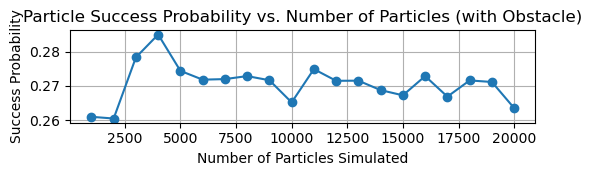


Final success probability ≈ 0.2636


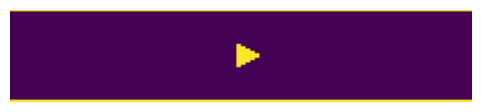

<Figure size 600x120 with 0 Axes>

In [66]:
particles_list = np.arange(1000, 21000, 1000)
percent_passed = []

A = np.zeros((maxX, maxY))
A[:, 0] = 1
A[:, maxY - 1] = 1

a = list(range(10, 0, -2))

for i in range(len(a)):
    for j in range(a[i]):
        A[98 + 2 * i, 24 - j - i] = 1
        A[99 + 2 * i, 24 - j - i] = 1

for num in particles_list:
    count = 0

    for i in range(num):
        x, y = maxX - 1, maxY // 2
        passed = True

        while True:
            r = np.random.random()
            if r < 0.5:
                x -= 1
            elif r < 0.6:
                x += 1
            elif r < 0.8:
                y += 1
            else:
                y -= 1

            if x > maxX - 1:
                x = maxX - 1
            if x < 0:
                break
            if y <= 0 or y >= maxY - 1:
                passed = False
                break

            if A[int(x), int(y)] == 1:
                passed = False
                break

        if passed:
            count += 1

    success_prob = count / num
    percent_passed.append(success_prob)
    print(f"N={num}, Success Probability={success_prob:.4f}")

plt.plot(particles_list, percent_passed, marker='o')
plt.xlabel("Number of Particles Simulated")
plt.ylabel("Success Probability")
plt.title("Particle Success Probability vs. Number of Particles (with Obstacle)")
plt.grid(True)
plt.show()

final_value = percent_passed[-1]
print(f"\nFinal success probability ≈ {final_value:.4f}")

display(A)

In [67]:
weights = particles_list
weighted_avg = np.average(percent_passed, weights=weights) * 100

print(f"\nWeighted average success probability = {weighted_avg:.4f}%")


Weighted average success probability = 27.0205%


N=1000, Success Probability=0.3810
N=2000, Success Probability=0.4065
N=3000, Success Probability=0.4057
N=4000, Success Probability=0.4073
N=5000, Success Probability=0.4088
N=6000, Success Probability=0.4037
N=7000, Success Probability=0.4154
N=8000, Success Probability=0.3960
N=9000, Success Probability=0.4016
N=10000, Success Probability=0.4023
N=11000, Success Probability=0.4115
N=12000, Success Probability=0.4020
N=13000, Success Probability=0.4005
N=14000, Success Probability=0.4030
N=15000, Success Probability=0.4034
N=16000, Success Probability=0.4036
N=17000, Success Probability=0.4078
N=18000, Success Probability=0.4043
N=19000, Success Probability=0.4039
N=20000, Success Probability=0.4002


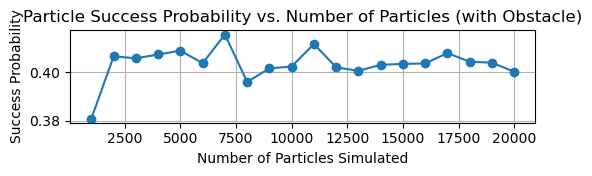


Final success probability ≈ 0.4002


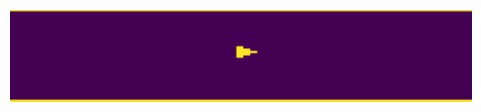

<Figure size 600x120 with 0 Axes>


Weighted average success probability = 40.3881%


In [68]:
particles_list = np.arange(1000, 21000, 1000)
percent_passed = []

A = np.zeros((maxX, maxY))
A[:, 0] = 1
A[:, maxY - 1] = 1

a = list(range(5, 0, -2))  # [5, 3, 1]

for i in range(len(a)):
    for j in range(a[i]):
        A[98 + 3 * i, 23 - j - i] = 1
        A[99 + 3 * i, 23 - j - i] = 1
        A[100 + 3 * i, 23 - j - i] = 1

for num in particles_list:
    count = 0

    for i in range(num):
        x, y = maxX - 1, maxY // 2
        passed = True

        while True:
            r = np.random.random()
            if r < 0.5:
                x -= 1
            elif r < 0.6:
                x += 1
            elif r < 0.8:
                y += 1
            else:
                y -= 1

            if x > maxX - 1:
                x = maxX - 1
            if x < 0:
                break
            if y <= 0 or y >= maxY - 1:
                passed = False
                break

            if A[int(x), int(y)] == 1:
                passed = False
                break

        if passed:
            count += 1

    success_prob = count / num
    percent_passed.append(success_prob)
    print(f"N={num}, Success Probability={success_prob:.4f}")

plt.plot(particles_list, percent_passed, marker='o')
plt.xlabel("Number of Particles Simulated")
plt.ylabel("Success Probability")
plt.title("Particle Success Probability vs. Number of Particles (with Obstacle)")
plt.grid(True)
plt.show()

final_value = percent_passed[-1]
print(f"\nFinal success probability ≈ {final_value:.4f}")

display(A)

weights = particles_list
weighted_avg = np.average(percent_passed, weights=weights) * 100

print(f"\nWeighted average success probability = {weighted_avg:.4f}%")

As expected, the probability of crossing unscathed is higher because there is less of a barrier to the endpoint.

N=1000, Success Probability=0.2030
N=2000, Success Probability=0.2420
N=3000, Success Probability=0.2333
N=4000, Success Probability=0.2248
N=5000, Success Probability=0.2204
N=6000, Success Probability=0.2240
N=7000, Success Probability=0.2253
N=8000, Success Probability=0.2362
N=9000, Success Probability=0.2244
N=10000, Success Probability=0.2231
N=11000, Success Probability=0.2354
N=12000, Success Probability=0.2287
N=13000, Success Probability=0.2308
N=14000, Success Probability=0.2204
N=15000, Success Probability=0.2243
N=16000, Success Probability=0.2199
N=17000, Success Probability=0.2269
N=18000, Success Probability=0.2217
N=19000, Success Probability=0.2223
N=20000, Success Probability=0.2250


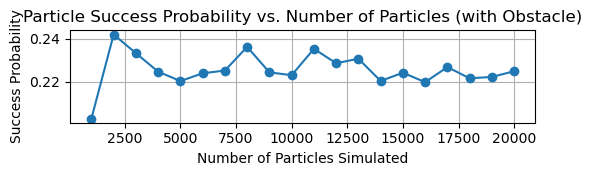


Final success probability ≈ 0.2250


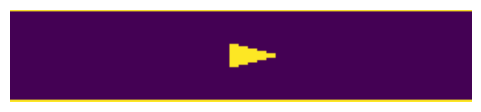

<Figure size 600x120 with 0 Axes>


Weighted average success probability = 22.5338%


In [69]:
particles_list = np.arange(1000, 21000, 1000)
percent_passed = []

A = np.zeros((maxX, maxY))
A[:, 0] = 1
A[:, maxY - 1] = 1

a = list(range(10, 0, -2))

for i in range(len(a)):
    for j in range(a[i]):
        A[95 + 4 * i, 24 - j - i] = 1
        A[95 + 4 * i + 1, 24 - j - i] = 1
        A[95 + 4 * i + 2, 24 - j - i] = 1
        A[95 + 4 * i + 3, 24 - j - i] = 1

for num in particles_list:
    count = 0

    for i in range(num):
        x, y = maxX - 1, maxY // 2
        passed = True

        while True:
            r = np.random.random()
            if r < 0.5:
                x -= 1
            elif r < 0.6:
                x += 1
            elif r < 0.8:
                y += 1
            else:
                y -= 1

            if x > maxX - 1:
                x = maxX - 1
            if x < 0:
                break
            if y <= 0 or y >= maxY - 1:
                passed = False
                break

            if A[int(x), int(y)] == 1:
                passed = False
                break

        if passed:
            count += 1

    success_prob = count / num
    percent_passed.append(success_prob)
    print(f"N={num}, Success Probability={success_prob:.4f}")

plt.plot(particles_list, percent_passed, marker='o')
plt.xlabel("Number of Particles Simulated")
plt.ylabel("Success Probability")
plt.title("Particle Success Probability vs. Number of Particles (with Obstacle)")
plt.grid(True)
plt.show()

final_value = percent_passed[-1]
print(f"\nFinal success probability ≈ {final_value:.4f}")

display(A)

weights = particles_list
weighted_avg = np.average(percent_passed, weights=weights) * 100

print(f"\nWeighted average success probability = {weighted_avg:.4f}%")

The pass rate drops from ~27% to ~22% when the obstacle is doubled in the x-direction. That’s expected: a wider obstacle increases exposure time along the flow direction, so more walkers collide. But because move probabilities are 60% horizontal (50% left, 10% right) and 40% vertical (20% up, 20% down), widening horizontally has a smaller marginal effect than increasing vertical extent. Vertical growth blocks more of the pipe’s cross-section and interacts directly with vertical diffusion, so it would reduce the success rate even more than the same-area horizontal stretch.